In [1]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:

cuciTangan = pd.read_csv('Dataset/Data Cuci Tangan Jakarta 20 10 2020.csv')
jagaJarak = pd.read_csv('Dataset//Data Jaga Jarak Jakarta 20 10 2020.csv')
masker = pd.read_csv('Dataset/Data Masker Jakarta 20 10 2020.csv')
penerapanProtokol = pd.read_csv('Dataset//Data Penerapan Protokol Kesehatan Jakarta  20 10 2020.csv')


In [11]:
dataset = pd.concat([cuciTangan,jagaJarak])
dataset = pd.concat([dataset,masker])
dataset = pd.concat([dataset,penerapanProtokol])
# dataset = penerapanProtokol

In [12]:
dataRT = dataset.iloc[:,[3,54]]
dataRT = dataRT[dataRT['retweet_screen_name'].notna()]
dataRT

screen_name retweet_screen_name
0         rebianca         KresnaAstra
1           nizfar         KresnaAstra
2        dddamnyou         KresnaAstra
3       querenciay         KresnaAstra
4      laodeyusuff         KresnaAstra
...            ...                 ...
3589      09prbKlt              tni_ad
3592  Koramilcawas              tni_ad
3593  kabey_oliver          Kemenag_RI
3595   politik2000       ruhutsitompul
3596   politik2000       ruhutsitompul

[10822 rows x 2 columns]

In [5]:
graphRT = nx.Graph()
for i, item in dataRT.iterrows():
    graphRT.add_edge(item[0], item[1])

In [6]:
def degree_centrality(G):
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

In [7]:
centralityRT = nx.degree_centrality(graphRT) 
top10RT = sorted(centralityRT.items(), key=lambda x: x[1], reverse=True)[:10]
top10RT

[('jokowi', 0.19260554584061954),
 ('drSodie', 0.18973270047464402),
 ('KresnaAstra', 0.15888083937047215),
 ('detikcom', 0.043967024731451414),
 ('ruhutsitompul', 0.0412190856857357),
 ('cinema21', 0.03097676742443168),
 ('oxfara', 0.029602797901573823),
 ('dondihananto', 0.021234074444166876),
 ('KemenkesRI', 0.021234074444166876),
 ('fahiraidris', 0.012740444666500126)]

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


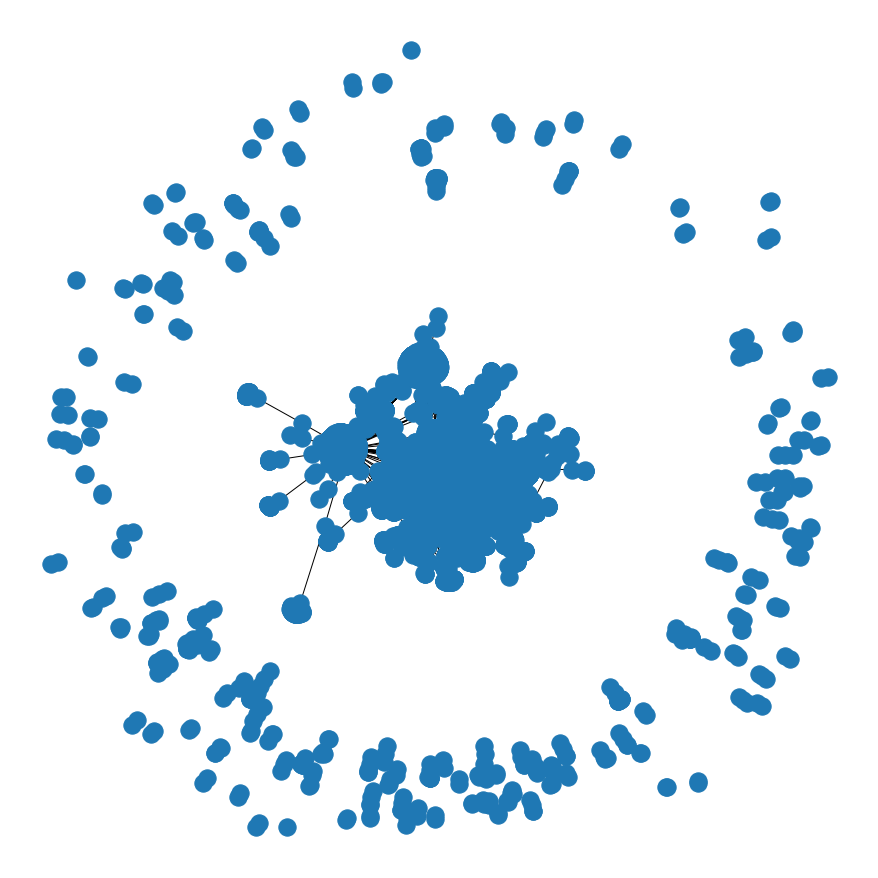

In [20]:
# graphVisual = nx.draw_networkx(graphRT, arrows=True, with_labels=False, node_size=60,font_size=8) 
plt.figure(3,figsize=(12,12)) 
nx.draw(graphRT)
plt.show()

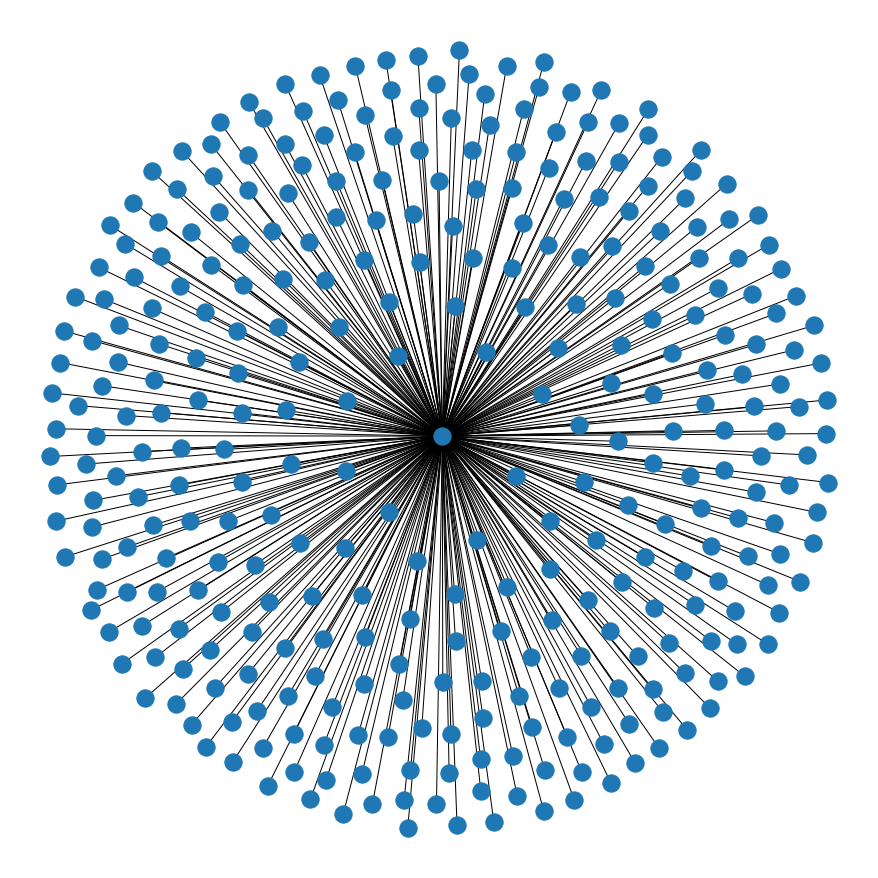

In [21]:
graphRTSpecific = nx.Graph()
for i, item in dataRT.iterrows():
#     print(item[])
    if item[1] == 'ruhutsitompul':
        graphRTSpecific.add_edge(item[0], item[1])
# graphVisual = nx.draw_networkx(graphRT, arrows=True, with_labels=False, node_size=60,font_size=8) 
plt.figure(3,figsize=(12,12)) 
nx.draw(graphRTSpecific)
plt.show()

In [10]:
# def calculate_degree(G,n = 0):
#     fmdegree = []
#     fmNode= []
#     for node in G.nodes():
#         tempD = G.degree(node)
#         if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
#     return fmdegree,fmNode

In [11]:
# gpdDegree, gpdNode = calculate_degree(graphRT,0)

In [12]:
# dataRT = {'Node' : gpdNode,
#         'Degree' : gpdDegree}
# nodeDegreeRT = pd.DataFrame(dataRT)

In [13]:
# nodeDegreeRT.sort_values(by=['Degree'], inplace=True, ascending=False)
# nodeDegreeRT.head(20)

In [14]:
dataMention = dataset.iloc[:,[3,30]]
dataMention = dataMention[dataMention['mentions_screen_name'].notna()]
dataMention

screen_name mentions_screen_name
0         rebianca          KresnaAstra
1           nizfar          KresnaAstra
2        dddamnyou          KresnaAstra
3       querenciay          KresnaAstra
4      laodeyusuff          KresnaAstra
...            ...                  ...
3589      09prbKlt               tni_ad
3592  Koramilcawas               tni_ad
3593  kabey_oliver           Kemenag_RI
3595   politik2000        ruhutsitompul
3596   politik2000        ruhutsitompul

[12558 rows x 2 columns]

In [15]:
graphMention = nx.Graph()
for i, item in dataMention.iterrows():
    graphMention.add_edge(item[0], item[1])

In [16]:
centralityMention = nx.degree_centrality(graphMention) 
top10Mention = sorted(centralityMention.items(), key=lambda x: x[1], reverse=True)[:10]
top10Mention

[('jokowi', 0.1580339879922662),
 ('drSodie', 0.1546758929480004),
 ('KresnaAstra', 0.1294392998880635),
 ('detikcom', 0.03744784776635799),
 ('ruhutsitompul', 0.033580950442657985),
 ('cinema21', 0.025236593059936908),
 ('oxfara', 0.02411722804518164),
 ('dondihananto', 0.017909840236084256),
 ('KemenkesRI', 0.017299277500763204),
 ('fahiraidris', 0.010583087412231606)]

In [17]:
# # graphVisual = nx.draw_networkx(graphRT, arrows=True, with_labels=False, node_size=60,font_size=8) 
# plt.figure(3,figsize=(12,12)) 
# nx.draw(graphMention)
# plt.show()

In [18]:
top10 = pd.DataFrame([top10RT,top10Mention]).T
print("Berdasarkan Keseluruhan Keyword")
top10 = top10.rename(columns={0 : 'Berdasarkan RT', 1 : 'Berdasarkan Mention'})

Berdasarkan Keseluruhan Keyword


In [19]:
top10

Berdasarkan RT                    Berdasarkan Mention
0         (jokowi, 0.19260554584061954)           (jokowi, 0.1580339879922662)
1        (drSodie, 0.18973270047464402)          (drSodie, 0.1546758929480004)
2    (KresnaAstra, 0.15888083937047215)      (KresnaAstra, 0.1294392998880635)
3      (detikcom, 0.043967024731451414)        (detikcom, 0.03744784776635799)
4   (ruhutsitompul, 0.0412190856857357)  (ruhutsitompul, 0.033580950442657985)
5       (cinema21, 0.03097676742443168)       (cinema21, 0.025236593059936908)
6        (oxfara, 0.029602797901573823)          (oxfara, 0.02411722804518164)
7  (dondihananto, 0.021234074444166876)   (dondihananto, 0.017909840236084256)
8    (KemenkesRI, 0.021234074444166876)     (KemenkesRI, 0.017299277500763204)
9   (fahiraidris, 0.012740444666500126)    (fahiraidris, 0.010583087412231606)